In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model
from sklearn import feature_selection, linear_model
import statsmodels.formula.api as smf

from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode()
cf.go_offline()

import warnings
warnings.filterwarnings('ignore')

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values
    pltTitle =''
    for x in X.columns.tolist():
        pltTitle +=  x +'+' 
    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    #plt.figure()
    plt.title(pltTitle)
    plt.hist(residuals,bins=int(np.ceil(np.sqrt(len(y)))))
    plt.show()
    # keep the model
    return algo

# Homework  
## With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:

- Add the three significant weather situations into our current model.
- Find two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

Data source
https://www.kaggle.com/c/bike-sharing-demand/data

Data Dict:

datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday  
workingday - whether the day is neither a weekend nor holiday  
weathersit -   
        1: Clear, Few clouds, Partly cloudy, Partly cloudy   
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist   
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog     
temp - temperature in Celsius  
atemp - "feels like" temperature in Celsius  
humidity - relative humidity  
windspeed - wind speed  
casual - number of non-registered user rentals initiated  
registered - number of registered user rentals initiated  
count - number of total rentals  

In [2]:
wd = '../../assets/dataset/bikeshare/'
bike_data = pd.read_csv(wd+'bikeshare.csv')

# add dummies col for weather and season
weather = pd.get_dummies(bike_data['weathersit'], prefix='weather', prefix_sep="_")
bikemodel_data = bike_data.join(weather[['weather_2','weather_3','weather_4']])

season = pd.get_dummies(bike_data['season'], prefix='season', prefix_sep="_")
bikemodel_data = bikemodel_data.join(season[['season_2','season_3','season_4']])

In [3]:
bikemodel_data.columns.tolist()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'weather_2',
 'weather_3',
 'weather_4',
 'season_2',
 'season_3',
 'season_4']

In [4]:
bikemodel_data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit    ...     windspeed  casual  registered  cnt  weather_2  \
0           1    ...           0.0       3          13   16          0   
1           1    ...           0.0       8          32   40          0   
2           1    ...           0.0       5          27   32          0   
3           1    ...           0.0       3          10   13          0   
4           1    ...           0.0       0           1    1          0   

   weather_3  weather_4  season_2  season_3  season_4  
0          0          0         0         0         0  
1          0          0         0         0         0  
2          0          0         0         0         0  
3          0          0         0         0         0  
4          0          0         0         0         0  

[5 rows x 23 columns]

['atemp', 'hum', 'workingday']
P Values: [ 0.  0.  0.]
Coefficients: [ 130.56846211  -81.36190728  -33.98651391]
y-intercept: 47.7908203153
R-Squared: 0.413680182431


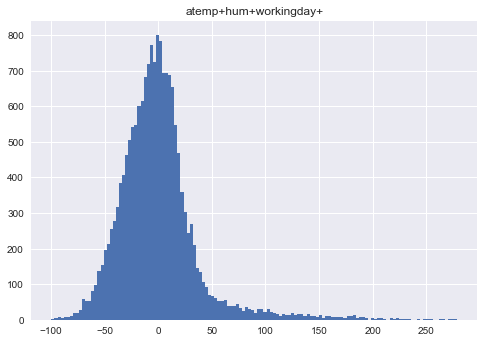

In [5]:
feature_cols = [['atemp','hum','workingday']]
response_col = 'casual'
for x in feature_cols:
    print x
    X = bikemodel_data[x]
    y = bikemodel_data[response_col]
    lm = linear_model.LinearRegression()
    get_linear_model_metrics(X,y,lm) 
    print

## Independent Practice: Building models for other y variables (25 minutes)

We've completely a model together that explains casual guest riders. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and registered riders  
* having a feature space (our matrix) with low multicollinearity  
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?  
* What features might explain ridership but aren't included in the data set? 
* Is there a way to build these using pandas and the features available?
* Outcomes If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task. 

### If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos!

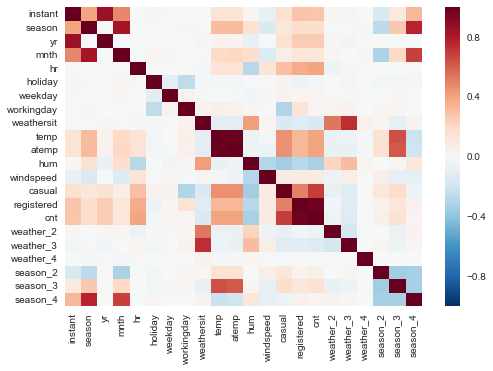

In [6]:
sns.heatmap(bikemodel_data.corr()) 

In [7]:
pd.crosstab(bikemodel_data.season, bikemodel_data.mnth)

mnth      1     2    3     4     5    6     7     8     9     10    11   12
season                                                                     
1       1429  1341  949     0     0    0     0     0     0     0     0  523
2          0     0  524  1437  1488  960     0     0     0     0     0    0
3          0     0    0     0     0  480  1488  1475  1053     0     0    0
4          0     0    0     0     0    0     0     0   384  1451  1437  960

In [8]:
bikemodel_data.columns.tolist()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'weather_2',
 'weather_3',
 'weather_4',
 'season_2',
 'season_3',
 'season_4']

In [9]:
col = ['season','weathersit','mnth','hr','windspeed','workingday','weekday','holiday']
for x in col:
       bikemodel_data.groupby(x).sum().registered.iplot(kind='bar',title='num of reg rider', xTitle=x, colors='blue')

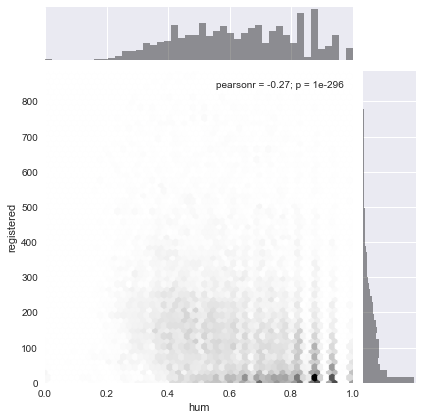

In [10]:
 sns.jointplot(x='hum', y='registered', data=bikemodel_data, kind="hex", color="k");

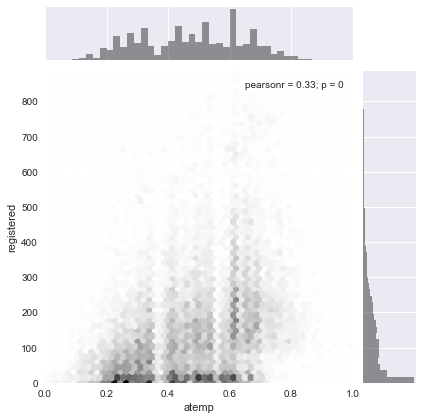

In [11]:
 sns.jointplot(x='atemp', y='registered', data=bikemodel_data, kind="hex", color="k");

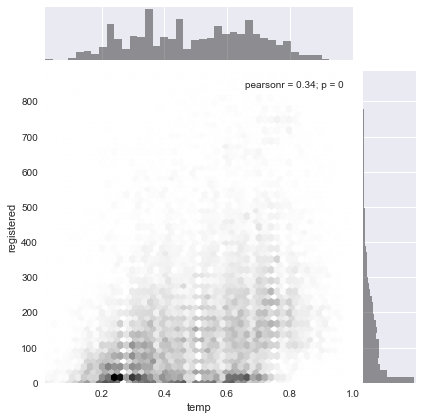

In [12]:
 sns.jointplot(x='temp', y='registered', data=bikemodel_data, kind="hex", color="k");

feature_cols = season
P Values: [  1.68536333e-118]
Coefficients: [ 23.82318806]
y-intercept: 94.1898311585
R-Squared: 0.0303545713345


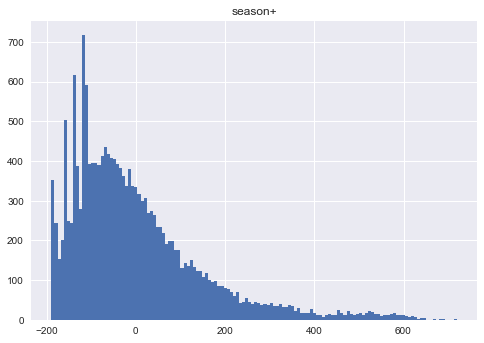


feature_cols = yr
P Values: [  2.36130468e-253]
Coefficients: [ 76.79273479]
y-intercept: 115.193869289
R-Squared: 0.0643557290423


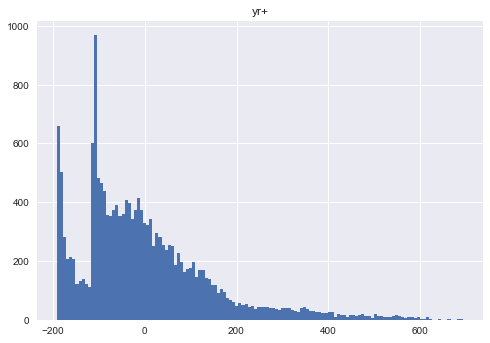


feature_cols = mnth
P Values: [  7.12215472e-59]
Coefficients: [ 5.38182945]
y-intercept: 118.601676647
R-Squared: 0.0149506784035


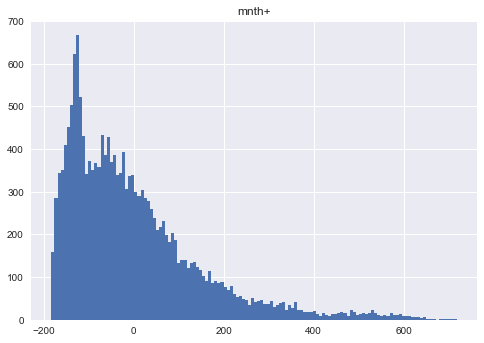


feature_cols = hr
P Values: [ 0.]
Coefficients: [ 8.189992]
y-intercept: 59.2190641625
R-Squared: 0.139981270758


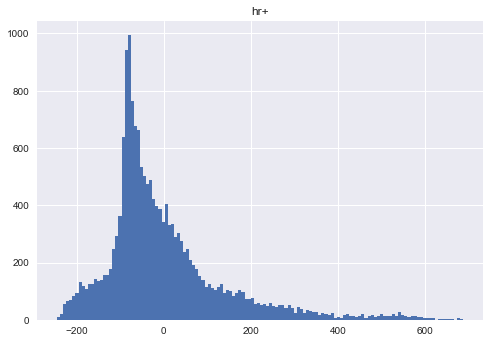


feature_cols = holiday
P Values: [  4.24958420e-10]
Coefficients: [-42.86820262]
y-intercept: 155.020202619
R-Squared: 0.00224158921242


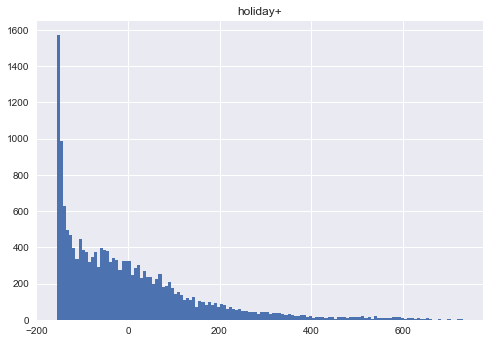


feature_cols = weekday
P Values: [ 0.00444494]
Coefficients: [ 1.62828653]
y-intercept: 148.896013297
R-Squared: 0.000465605270953


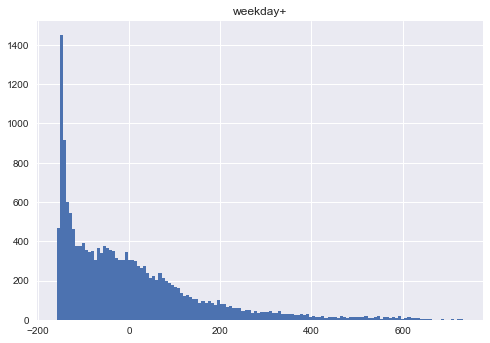


feature_cols = workingday
P Values: [  8.83608168e-71]
Coefficients: [ 43.68252906]
y-intercept: 123.963910047
R-Squared: 0.0180434181637


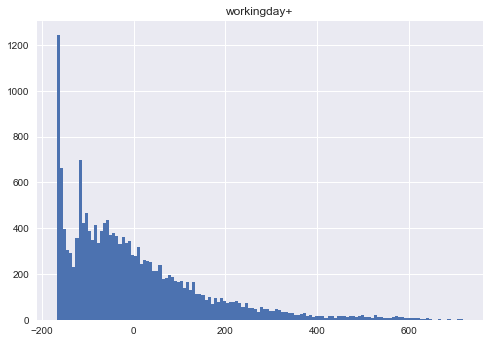


feature_cols = weathersit
P Values: [  1.18924984e-57]
Coefficients: [-28.63660874]
y-intercept: 194.602151936
R-Squared: 0.0146326569606


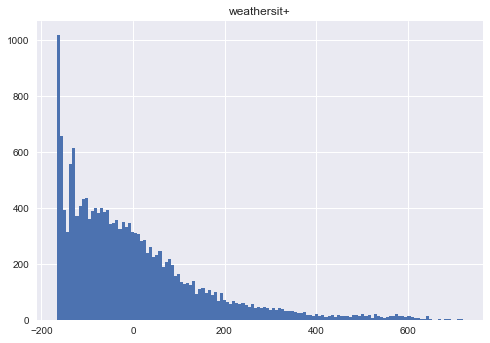


feature_cols = temp
P Values: [ 0.]
Coefficients: [ 263.60786447]
y-intercept: 22.7771430753
R-Squared: 0.112466899071


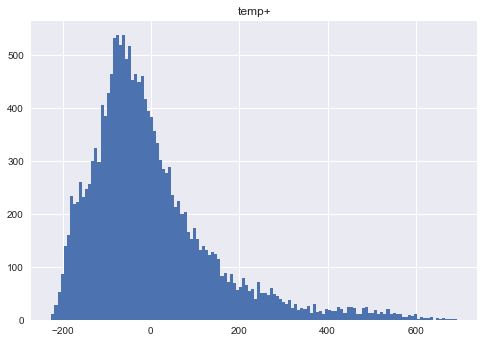


feature_cols = atemp
P Values: [ 0.]
Coefficients: [ 292.9014216]
y-intercept: 14.4316654332
R-Squared: 0.110595245982


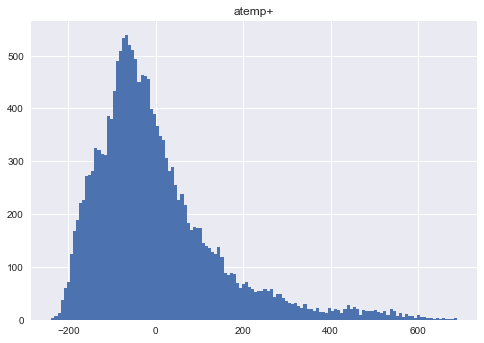


feature_cols = hum
P Values: [  1.01368000e-296]
Coefficients: [-214.90597106]
y-intercept: 288.582092021
R-Squared: 0.0750393534067


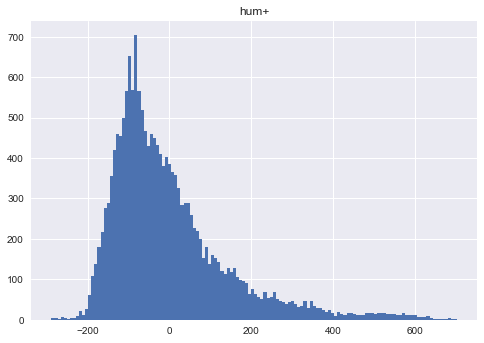


feature_cols = windspeed
P Values: [  1.60231470e-27]
Coefficients: [ 101.84597639]
y-intercept: 134.426192886
R-Squared: 0.00677672191058


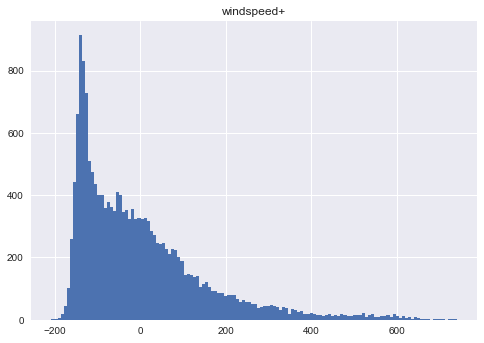


feature_cols = casual
P Values: [ 0.]
Coefficients: [ 1.55522225]
y-intercept: 98.3024206379
R-Squared: 0.256661494388


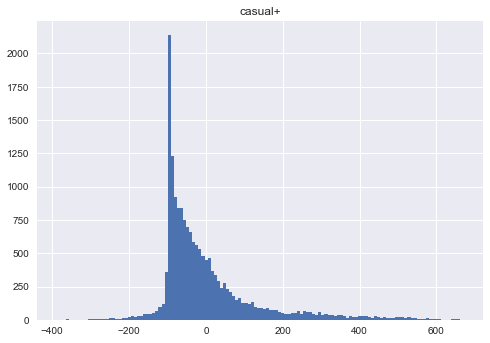


feature_cols = registered
P Values: [ 1.]
Coefficients: [ 1.]
y-intercept: 0.0
R-Squared: 1.0


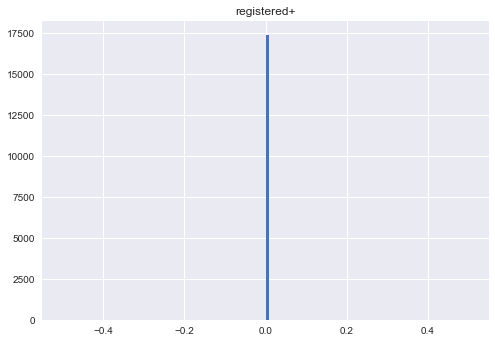


feature_cols = cnt
P Values: [ 0.]
Coefficients: [ 0.81120262]
y-intercept: 0.093915602463
R-Squared: 0.94507704352


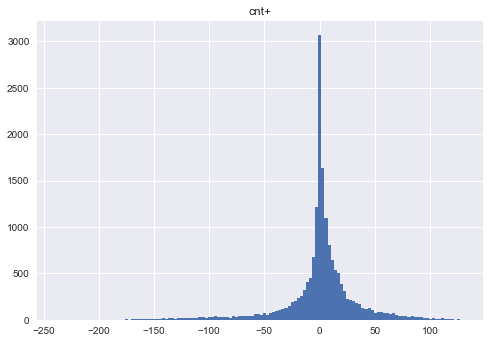


feature_cols = weather_2
P Values: [  2.05227213e-05]
Coefficients: [-11.12562925]
y-intercept: 156.69583171
R-Squared: 0.00104340310097


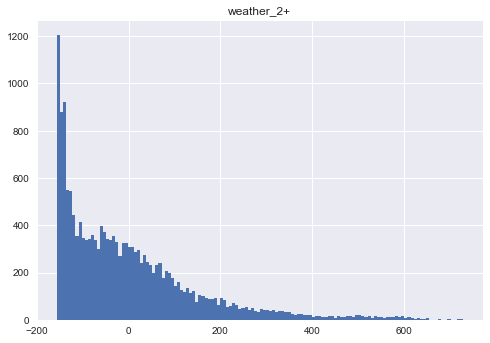


feature_cols = weather_3
P Values: [  4.73056490e-52]
Coefficients: [-63.44343443]
y-intercept: 158.967042607
R-Squared: 0.0131752059671


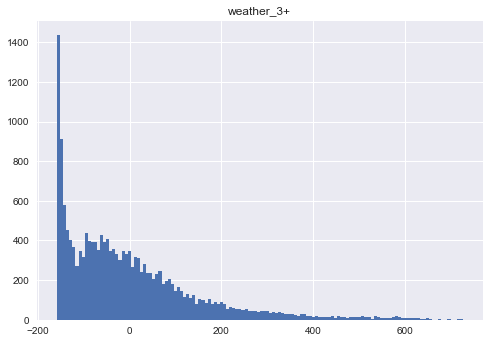


feature_cols = weather_4
P Values: [ 0.34732446]
Coefficients: [-82.13438076]
y-intercept: 153.801047422
R-Squared: 5.08264524109e-05


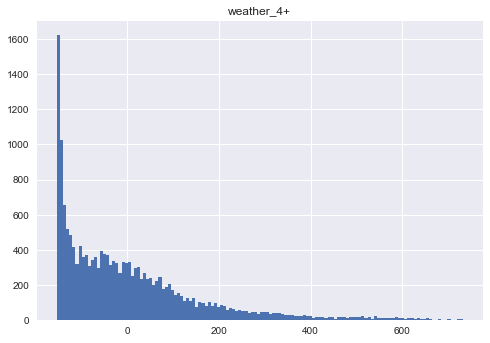


feature_cols = season_2
P Values: [  1.99995088e-05]
Coefficients: [ 11.2509517]
y-intercept: 150.932536623
R-Squared: 0.00104623045065


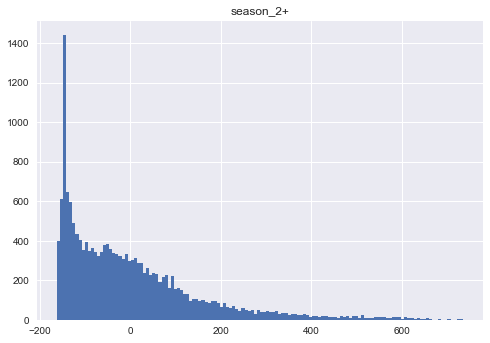


feature_cols = season_3
P Values: [  3.72743439e-61]
Coefficients: [ 43.08964519]
y-intercept: 142.639447334
R-Squared: 0.0155438252943


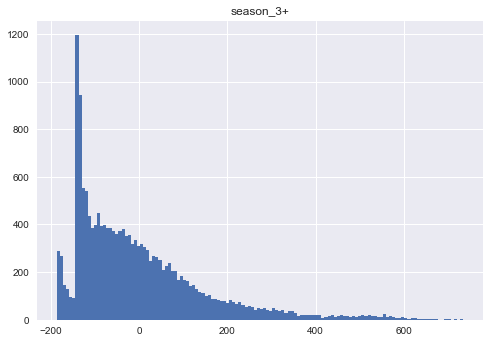


feature_cols = season_4
P Values: [  1.01606195e-12]
Coefficients: [ 19.05538271]
y-intercept: 149.146649426
R-Squared: 0.00291995685276


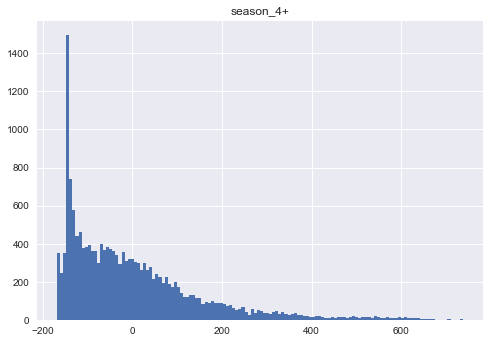

In [13]:
# Checking correlations with variables and registered riders
feature_cols = bikemodel_data.columns.tolist()[2:]
response_col = 'registered'
for x in feature_cols:
    print 'feature_cols = ' + x
    x = [x]
    X = bikemodel_data[x]
    y = bikemodel_data[response_col]
    lm = linear_model.LinearRegression()
    get_linear_model_metrics(X,y,lm) 
    print